# Color Diagram of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [27]:
#importing the uncleaned data
data_uncleaned=pd.read_csv('Computational Data Without Identifiers.csv')
#importing the cleaned data
data=pd.read_csv(r'C:\Users\Grant\Desktop\Cleaned PERL Research data.csv', encoding='latin1')
Rows = 1246
Inst_List_data=pd.read_csv('List of Institutions.csv')

In [3]:
Inst_List = []
Inst_id = 0
for i in Inst_List_data.values:
    Inst_id = Inst_id+1
    Inst_List.append(i)
Inst_id_array = np.asarray(Inst_List)

In [4]:
#Creates a function with two user inputs, one for the first column to be used, one for the last
def Replace_Number(Column_Low_Limit,Column_High_Limit):
#The Difference between the the user inputs
    Limit_Diff = Column_High_Limit-Column_Low_Limit
    index_fix = Column_Low_Limit
    a = 0
#Creates a matrix of zeros that matches the size of the data to be changes to numbers
    global Numeric_data
    Numeric_data = np.zeros((Rows, Limit_Diff+1))
    while Column_Low_Limit <= Column_High_Limit:
        Rows_Complete = 1
#Selects each individual row in a column
        for i in data.values[1:1246,Column_Low_Limit]:
        #Replaces 0s with a +1 or -1, depending on answers in the data
            if i == "Checked" or i == "Yes" or i == "Agree" or i == "Strongly agree" or i == "Very strongly supported" or i == "Strongly supported" or  i == "Somewhat supported" or i == "Often" or i == "Sometimes" or i == "Used Often" or i == "Used Sometimes" or i == "Used rarely":    
                a = 1
                Numeric_data[Rows_Complete-1,Column_Low_Limit-index_fix] = a
            if i == "Unchecked" or i == "No" or i == "Disagree" or i == "Strongly disgaree" or i == "Never" or i == "Not supported" or i == "Not used at all":
                a = -1
                Numeric_data[Rows_Complete-1,Column_Low_Limit-index_fix] = a
            if Rows_Complete + 1 == Rows:
                Column_Low_Limit = Column_Low_Limit + 1
            Rows_Complete = Rows_Complete + 1

In [5]:
Replace_Number(1,148)

In [6]:
#Creats a list that will be used to track the number of rows that have been combound based on a shared institution
global Rows_Compressed
Rows_Compressed = []

In [21]:
def Compress_Rows(Row_Low_Limit,Row_High_Limit,Iteration_Fact):
    #Adjusts the input limits so that the imputs can be taken directly from the data
    Row_Low_Limit = Row_Low_Limit-1
    Row_High_Limit = Row_High_Limit-1
    #Program runs differently if it has run before
    if Iteration_Fact == "No":
        #Creates a zeros matrix or the correct size
        global Compress_Row_I0
        Compress_Row_I0 = np.zeros((Rows-(Row_High_Limit-Row_Low_Limit), 148))
        #Keeps the data before the lower limit the same
        Compress_Row_I0[0:Row_Low_Limit-2,:] = Numeric_data[0:Row_Low_Limit-2,:]
        #Keeps the data after the lower limit the same
        Compress_Row_I0[Row_Low_Limit:Rows-(Row_High_Limit-Row_Low_Limit),:] = Numeric_data[Row_High_Limit:Rows,:]
        #Takes the data that needs to be summed
        Compressed_Row = Numeric_data[Row_Low_Limit-1:Row_High_Limit-1,:]/(Row_High_Limit-Row_Low_Limit+1)
        #Sums the data and puts it into the new matrix
        Compress_Row_I0[Row_Low_Limit-1,:] = np.sum(Compressed_Row, axis=0)
        #Updates the number of Rows removed
        Rows_Compressed.append(Row_High_Limit-Row_Low_Limit)
    #Program runs differently if it has run before
    if Iteration_Fact == "Yes":
        #Changes the fromat for the number of rows removed so it can be manipulated
        Rows_Compressed_Array = np.asarray(Rows_Compressed)
        #Adds up the number of rows removed from every iteration
        Rows_Compressed_Int = Rows_Compressed_Array.sum()
        global Compress_Row_In
        Compress_Row_In = np.zeros(((Rows-Rows_Compressed_Int-(Row_High_Limit-Row_Low_Limit),148)))
        #Keeps the data before the lower limit the same
        Compress_Row_In[0:Row_Low_Limit-Rows_Compressed_Int-2] = Compress_Row_I0[0:Row_Low_Limit-Rows_Compressed_Int-2]
        #Keeps the data after the lower limit the same
        Compress_Row_In[Row_Low_Limit:Rows-(Row_Low_Limit-Row_High_Limit)-Rows_Compressed_Int,:] = Compress_Row_I0[Row_High_Limit:Rows-Rows_Compressed_Int,:]   
        #Takes the data that needs to be summed
        Compressed_Row = Compress_Row_I0[Row_Low_Limit-1:Row_High_Limit-1,:]/(Row_High_Limit-Row_Low_Limit+1)
        #Sums the data and puts it into the new matrix
        Compress_Row_In[Row_Low_Limit-Rows_Compressed_Int-1,:] = np.sum(Compressed_Row, axis=0)
        #Changes the matrix used at the begining of this segment to be the end result so the program can be run again
        Compress_Row_I0 = Compress_Row_In
        #Updates the number of rows removed
        Rows_Compressed.append(Row_High_Limit-Row_Low_Limit)

        

In [95]:
#Clears the list so the cell can be ran again
Rows_Compressed = []
#Creates a matrix of zeros for later use
Inst_List = np.zeros((360,1))
#Used for indexing the institution place
Inst_Place = -1
#The number of times the loop has been run, used for indexing
Loop_Runs = 0
#Usesd to make the Compress_Rows function work properly
Compress_Once = 0
#Runs through the entire list of institutions surveyed (This list contains multiples of each institution, corresponding to the number of responses from that institution)   
for i in Inst_List_data:
    #Inceses the number of times the loop has ran by 1
    Loop_Runs+=1
    #Used for the special case of one loop run (because to determine if responses came from the same institution the previous cell must be compared to the current one)   
    if Loop_Runs == 1:
        #Increases the indexing number by one
        Inst_Place+=1
        #This part doesn't function yet, supposed to put institution name into cell
        Inst_List[Inst_Place,0]
    #Used all other cases
    if Loop_Runs >= 2:
        #If only time the someone asnswered the survey from a given institution
        if Inst_List_data[Loop_Runs-1,0] != Inst_List_data[Loop_Runs-2,0] and Inst_List_data[Loop_Runs-1,0] != Inst_List_data[Loop_Runs,0]:   
            Inst_Place+=1
            Inst_List[Inst_Place,0]
        #If there is a response after the current one from the same institution
        if Inst_List_data[Loop_Runs-2,0] != Inst_List_data[Loop_Runs-1,0] and Inst_List_data[Loop_Runs-1,0] == Inst_List_data[Loop_Runs,0]:   
            Low_Limit = Loop_Runs
            #If the current response is different from the one that is two below it and this hasn't happened before
            if Inst_List_data[Loop_Runs-1,0] != Inst_List_data[Loop_Runs+1,0] and Compress_Once != 1:
                Compress_Rows(Low_Limit,Loop_Runs,"No")
                Inst_Place+=1
                #Doesn't work yet
                Inst_List[Inst_Place,0]
                #Updates the Compress_Once variable so this if statement won't run again
                Compress_Once = 1
            #If the current response is different from the one that is two below it and this has happened before
            if Inst_List_data[Loop_Runs-1,0] != Inst_List_data[Loop_Runs+1,0] and Compress_Once == 1:
                Compress_Rows(Low_Limit,Loop_Runs,"Yes")
                Inst_Place+=1
                #Doesn't work yet
                Inst_List[Inst_Place,0]


In [96]:
Graphable_data = np.zeros((360,149))
Graphable_data[:,1:149] = Compress_Row_I0
Graphable_data[:,0] = Inst_List[:,0]
y = np.zeros((1,148))

(0, 148)

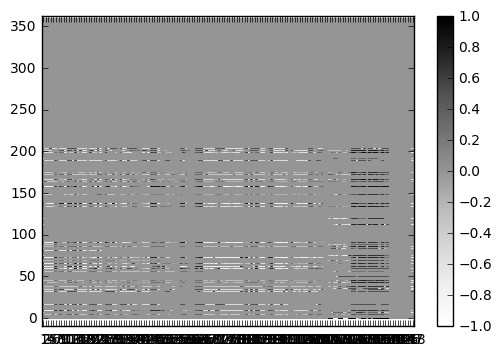

In [97]:
df_pivot = pd.DataFrame(Graphable_data)
x = np.arange(df_pivot.columns.min()-1, df_pivot.columns.max() + 1, 1)
y = np.arange(df_pivot.index.min()-1, df_pivot.index.max() + 1, 1)

X, Y = np.meshgrid(x, y)
z = df_pivot.values

fig, ax = plt.subplots()

cbar = ax.pcolormesh(X, Y, z, cmap='Greys')

fig.colorbar(cbar, )


# ax.set_ylim(-1, 10)

ax.set_xticks(x + 0.5)
ax.set_xticklabels(x+1)
#ax.grid(True)
plt.ylim(-10,362)
plt.xlim(0,148)